In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


## 1 Load Data

In [11]:
item_cat=pd.read_csv("../datasets/item_categories.csv")
item=pd.read_csv("../datasets/items.csv")
sub=pd.read_csv("../datasets/sample_submission.csv")
shops=pd.read_csv("../datasets/shops.csv")
test=pd.read_csv("../datasets/test.csv")
sales=pd.read_csv("../datasets/sales_train.csv")

## 2 Data visualization

### 2.1 Item and Item category

In [18]:
print('number of item category: ', len(item_cat))
print('number of item: ', len(item))

number of item category:  84
number of item:  22170


#### How many items are in each category

In [177]:
def data_disribution(data, largest=0, label_inform=[''], log = False, dispaly = False):
    ## draw the data distribution
    #  data:  a column list
    #  largest:  only drow first largest number of value. 0 means draw all the data
    #  log:  set_yscale('log')
    distance_dic = {}
    ini = -1
    for i in data:
        if i != ini:
            ini = i
            distance_dic[i] = data.count(i)
            # distance_list.append(i)

    if largest:
        distance_dic_sort = dict(sorted(distance_dic.items(), key=lambda x: x[1], reverse=True)[:largest])
        distance_dic_sort_key = {}
        for key in sorted(distance_dic_sort):
            distance_dic_sort_key[key] = distance_dic_sort[key]

        f_p = plt.gca()
        f_p.bar(range(0, len(distance_dic_sort_key.keys()), 1),distance_dic_sort_key.values(), width=0.7, color='b')        # f_p.set_yscale('log')
        if log:
            f_p.set_yscale('log')
        plt.title(label_inform[0])
        plt.ylabel(label_inform[1])
        plt.xlabel(label_inform[2])
        plt.savefig('../fig/'+label_inform[0]+'.jpg')
        if dispaly:
            plt.show() 
        return

    f_p = plt.gca()
    f_p.bar(range(0, len(distance_dic.keys()), 1),distance_dic.values(), width=0.7, color='b')
    if log:
        f_p.set_yscale('log')
    plt.title(label_inform[0])
    plt.ylabel(label_inform[1])
    plt.xlabel(label_inform[2])
    plt.savefig('../fig/'+label_inform[0]+'.jpg')
    if dispaly:
        plt.show()
    

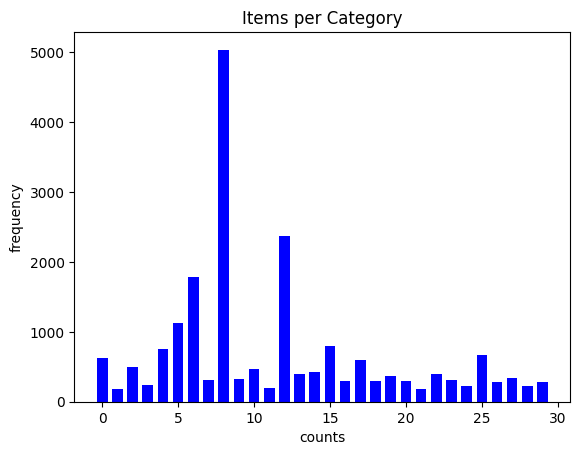

In [178]:
item_sort = item.sort_values('item_category_id')
plot_information = ['Items per Category', 'frequency', 'counts']
data_disribution(list(item_sort['item_category_id']),30, plot_information, log = False, dispaly=True)

In [182]:
def draw_distribution(data, log=False):
    for i in (data.columns.values):
        plot_information = [i, 'frequency', 'counts']
        data_sort = data.sort_values(i)
        data_disribution(list(data_sort[i]),30, plot_information, log = False, dispaly=False)
        print(i, 'save successful')

item_name save successful
item_id save successful
item_category_id save successful


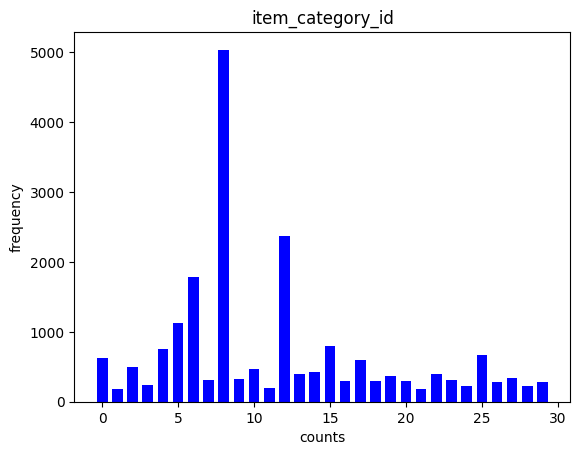

In [185]:
draw_distribution(item)

date save successful
date_block_num save successful
shop_id save successful
item_id save successful
item_price save successful
item_cnt_day save successful


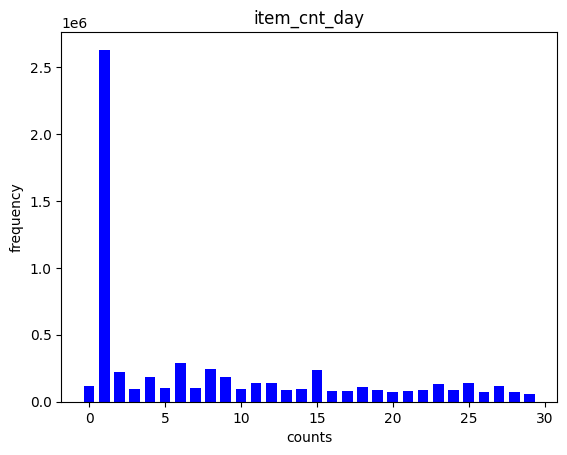

In [186]:
draw_distribution(sales, log=True)

---

<AxesSubplot: xlabel='item_price'>

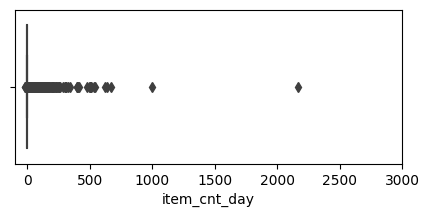

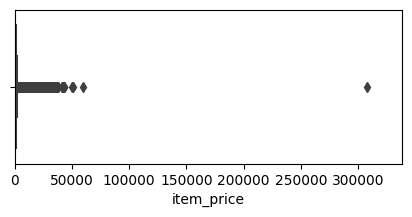

In [193]:
plt.figure(figsize=(5,2))
plt.xlim(-100, 3000)
sns.boxplot(x=sales.item_cnt_day)

plt.figure(figsize=(5,2))
plt.xlim(sales.item_price.min(), sales.item_price.max()*1.1)
sns.boxplot(x=sales.item_price)

In [194]:
train = sales

In [195]:
median = train[(train.shop_id==32)&(train.item_id==2973)&(train.date_block_num==4)&(train.item_price>0)].item_price.median()
train.loc[train.item_price<0, 'item_price'] = median

In [197]:
median

1874.0

---

In [8]:
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"item_price":"mean","item_cnt_day":"sum"})
monthly_sales.to_csv('Train.csv')

/var/folders/z4/snjl44yd2sz6dxh5_3nlrgyh0000gn/T/ipykernel_57141/2271311395.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[


In [9]:
monthly_sales

item_price  item_cnt_day
date_block_num shop_id item_id                          
0              0       32            221.0           6.0
                       33            347.0           3.0
                       35            247.0           1.0
                       43            221.0           1.0
                       51            128.5           2.0
...                                    ...           ...
33             59      22087         119.0           6.0
                       22088         119.0           2.0
                       22091         179.0           1.0
                       22100         629.0           1.0
                       22102        1250.0           1.0

[1609124 rows x 2 columns]